In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',None)

import sklearn
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Finding the columns with null values**

In [6]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(),4),'% missing')

total_bedrooms 0.01 % missing


**Checking the Relations between missing values and median income**

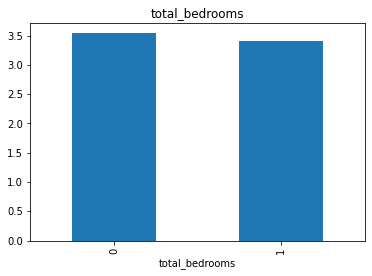

In [7]:
for feature in features_with_na:
  data = df.copy()
  data[feature] = np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['median_income'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [8]:
numerical_features = [ feature for feature in df.columns if df[feature].dtypes !='O']
print ("Total numerical featuress present are:{}".format(len(numerical_features)))

df[numerical_features].head()

Total numerical featuress present are:9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Filtering unwanted columns**

In [13]:
dtfil=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households',
       'median_house_value']]
dtfil

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,84700.0


In [14]:
dtfil.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_house_value      0
dtype: int64

In [15]:
dtfil[dtfil['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,161900.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,85100.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,173400.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,247100.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,178400.0
...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,220500.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,167400.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,410700.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,258100.0


In [16]:
dtfil.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c18fdce90>,
      dtype=object)

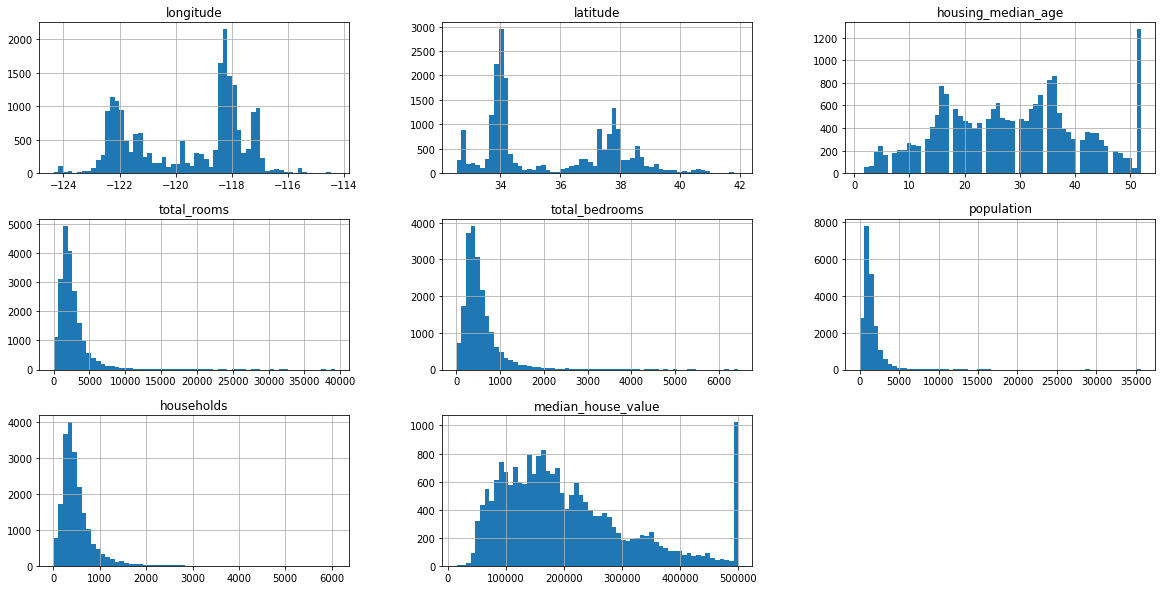

In [17]:
dtfil.hist(bins=60, figsize=(20,10))

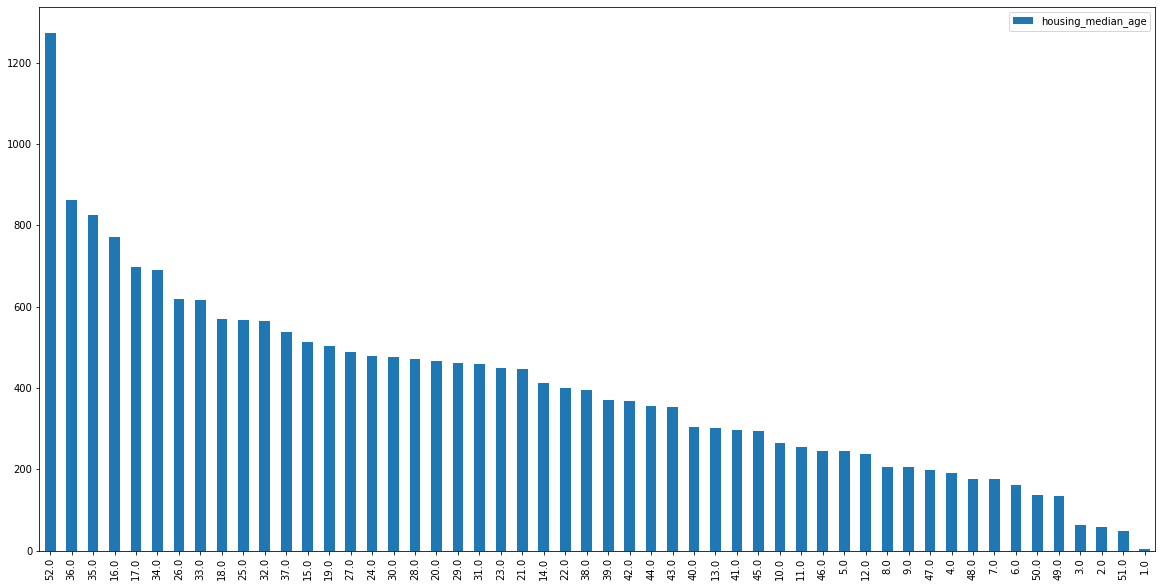

In [18]:
pd.DataFrame(dtfil['housing_median_age'].value_counts()).plot(kind='bar', figsize=(20,10))

## **Scaling the data**

Applying logarithmic transformation to normalize post to see a monotonous distribution

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


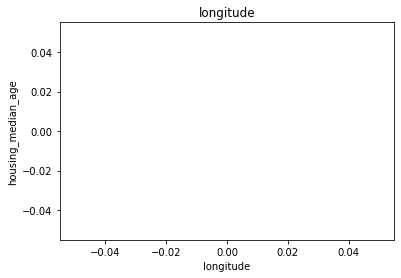

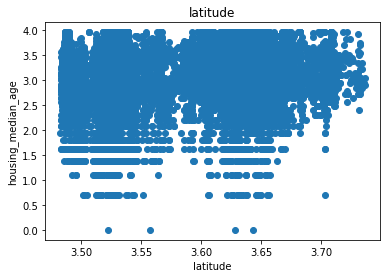

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


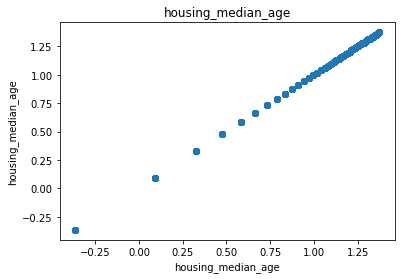

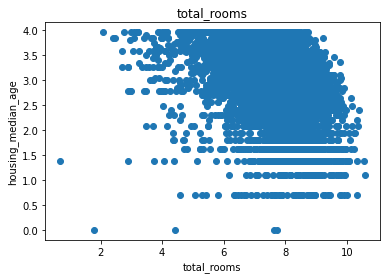

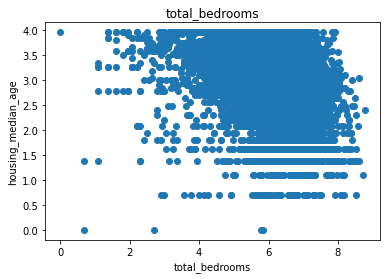

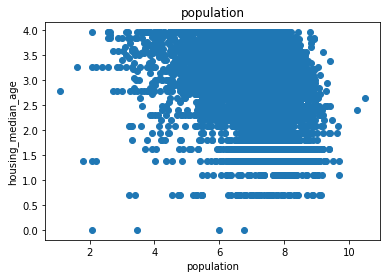

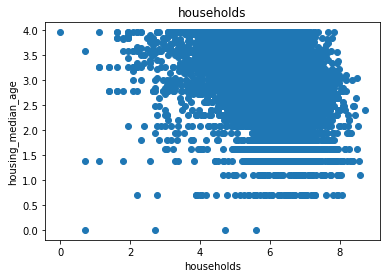

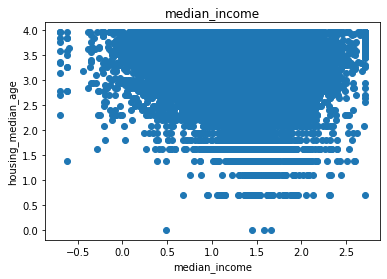

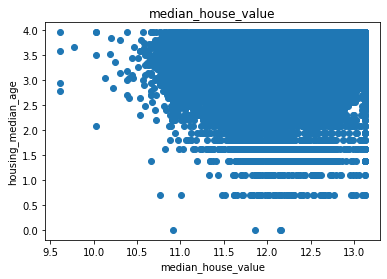

In [22]:
for feature in numerical_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['housing_median_age'] = np.log(data['housing_median_age'])
    plt.scatter(data[feature],data['housing_median_age'])
    plt.xlabel(feature)
    plt.ylabel('housing_median_age')
    plt.title(feature)
    plt.show()

Use Scaling to a range to check the is distributes data uniformly or not

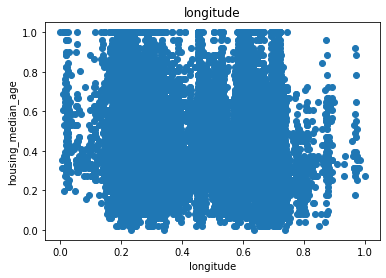

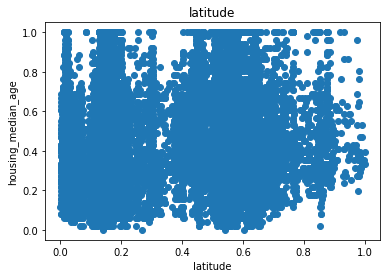

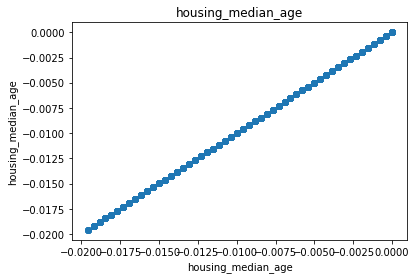

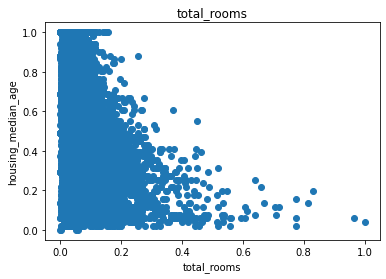

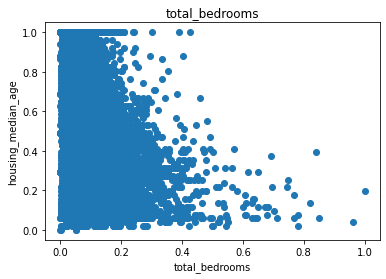

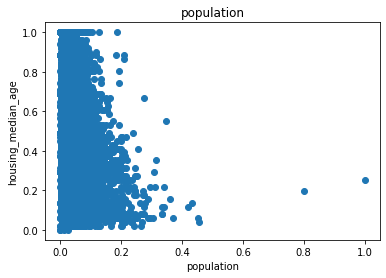

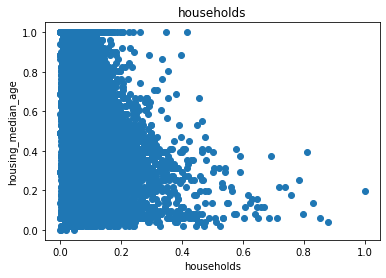

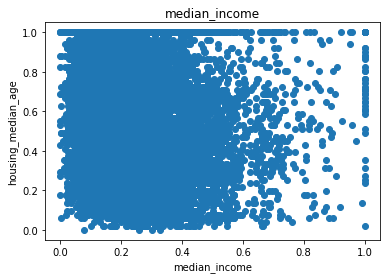

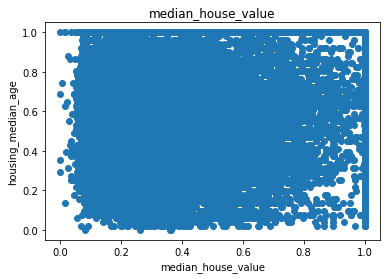

In [24]:
housing_median_age_min = df['housing_median_age'].min(skipna = True)
housing_median_age_max = df['housing_median_age'].max(skipna = True)
for feature in numerical_features:
  data = df.copy()
  feature_min = data[feature].min(skipna = True)
  feature_max = data[feature].max(skipna = True)
  data[feature] = (data[feature] - feature_min)/(feature_max-feature_min)
  data['housing_median_age'] = (data['housing_median_age'] - housing_median_age_min)/(housing_median_age_max - housing_median_age_min)
  plt.scatter(data[feature],data['housing_median_age'])
  plt.xlabel(feature)
  plt.ylabel('housing_median_age')
  plt.title(feature)
  plt.show()

**Applying z-score scaling on the seleced features**

In [ ]:
housing_median_age_mean = df['housing_median_age'].mean()
housing_median_age_std = df['housing_median_age'].std()
for feature in numerical_features:
  data = df.copy()
  feature_mean = df[feature].mean()
  feature_std = df[feature].std()
  data[feature] = (data[feature]-feature_mean)/feature_std
  data['housing_median_age'] = (data['housing_median_age']-housing_median_age_mean)/housing_median_age_std
  plt.xlabel(feature)
  plt.ylabel('housing_median_age')
  plt.title(feature)
  plt.show()

Finding outliers

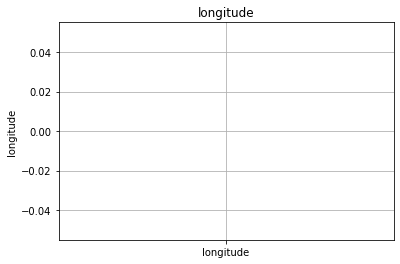

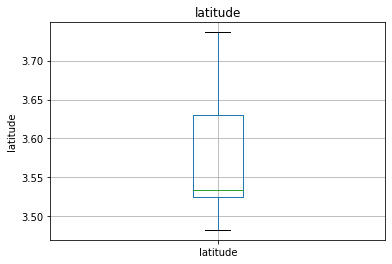

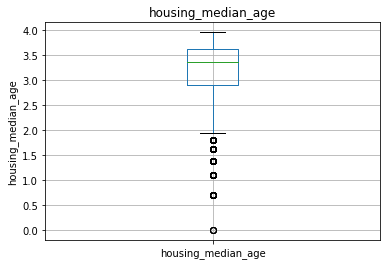

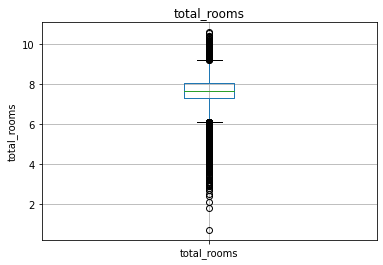

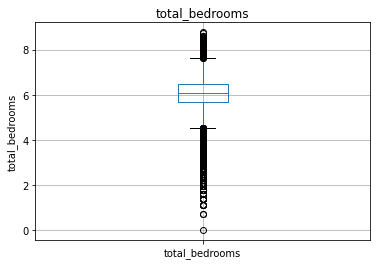

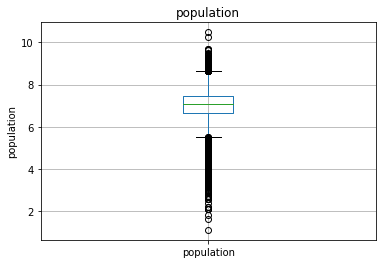

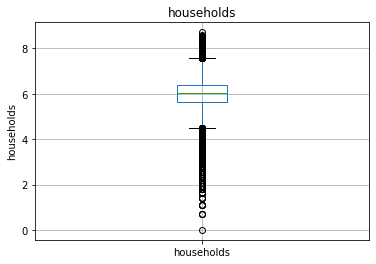

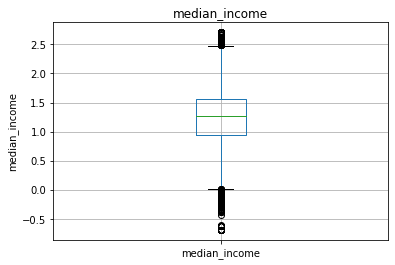

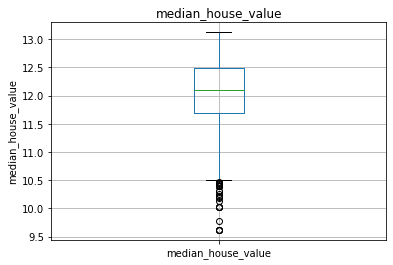

In [27]:
for feature in numerical_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Finding categorical features

In [28]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(len(cat_features))
cat_features

1


['ocean_proximity']

In [30]:
for feature in cat_features:
  print("The feature {} has {} different categories".format(feature,len(df[feature].unique())))

The feature ocean_proximity has 5 different categories


**Find the relationship between categorical features and dependent feature**

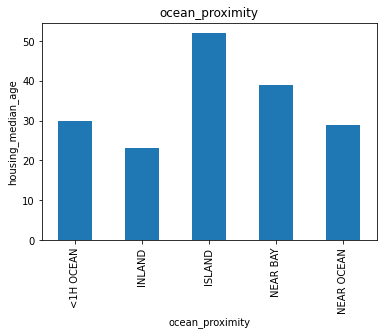

In [31]:
for feature in cat_features:
  data = df.copy()
  data.groupby(feature)['housing_median_age'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('housing_median_age')
  plt.title(feature)
  plt.show()

**Handle Missing Data** 

categorical features

In [32]:
cat_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes == 'O']
cat_features_nan
for feature in cat_features_nan:
  print("{} has {}% values missing".format(feature,np.round(df[feature].isnull().mean(),4)))

In [37]:
def replace_cat_nans(dataset,cat_features):
  data = df.copy()
  data[cat_features] = data[cat_features].fillna('null')
  return data
data = replace_cat_nans(df,cat_features_nan)
data[cat_features_nan].isnull().sum()

Series([], dtype: float64)

Handle missing values in numerical features

In [38]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes !='O']
numerical_nan
for feature in numerical_nan:
  print("{} feature has {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

total_bedrooms feature has 0.01% missing values


In [39]:
dataset = df[['total_bedrooms']].copy()

for feature in numerical_nan:
  median_val = df[feature].median()
  df[feature +'NaN'] = np.where(df[feature].isnull(),1,0)
  df[feature].fillna(median_val,inplace=True)
 

df[numerical_nan].isnull().sum()

dataset.head()

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0


**Using MICE(gradient booster regressor)**

In [41]:
def mice_imputation_numeric(dataset):
    numeric_imputer = IterativeImputer(GradientBoostingRegressor())
    numeric_imputed = numeric_imputer.fit_transform(dataset)
    return numeric_imputed
    print(type(numeric_imputed))
numeric_imputed_pd = mice_imputation_numeric(dataset)

In [42]:
print(numeric_imputed_pd)

[[ 129.]
 [1106.]
 [ 190.]
 ...
 [ 485.]
 [ 409.]
 [ 616.]]


Applying logscaling

In [43]:
num_features = ['housing_median_age', 'total_rooms','total_bedrooms', 'population','median_income']
for feature in num_features:
  df[feature] = np.log(df[feature])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsNaN
0,-122.23,37.88,3.713572,6.779922,4.859812,5.774552,126.0,2.119287,452600.0,NEAR BAY,0
1,-122.22,37.86,3.044522,8.867709,7.008505,7.783641,1138.0,2.116424,358500.0,NEAR BAY,0
2,-122.24,37.85,3.951244,7.290975,5.247024,6.206576,177.0,1.982022,352100.0,NEAR BAY,0
3,-122.25,37.85,3.951244,7.149917,5.459586,6.324359,219.0,1.730434,341300.0,NEAR BAY,0
4,-122.25,37.85,3.951244,7.394493,5.634790,6.336826,259.0,1.347086,342200.0,NEAR BAY,0


**Feature scaling**

In [48]:
features_scale = [feature for feature in df.columns if feature not in ['ocean_proximity']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(df[features_scale])

MinMaxScaler()

In [49]:
scaler.transform(df[features_scale])


array([[0.21115538, 0.5674814 , 0.9398489 , ..., 0.82690389, 0.90226638,
        0.        ],
       [0.21215139, 0.565356  , 0.77052256, ..., 0.82606221, 0.70824656,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.78654837, 0.69505074,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.71704343, ..., 0.35984418, 0.15938285,
        0.        ],
       [0.30179283, 0.73219979, 0.73150936, ..., 0.38742447, 0.14371281,
        0.        ],
       [0.30976096, 0.72582359, 0.70170025, ..., 0.45982617, 0.15340349,
        0.        ]])

**Feature subset selection**

In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
y_train = df['housing_median_age']
x_train = df.drop(['ocean_proximity'],axis = 1)

feature_selection_model = SelectFromModel(Lasso(alpha = 0.005,random_state = 0))
feature_selection_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [51]:
feature_selection_model.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False])

Getting features that are required or not

In [52]:
selected_features = x_train.columns[(feature_selection_model.get_support())]
print("total features {}".format(x_train.shape[1]))
print("selected features {}".format(len(selected_features)))
print("features with least coefficient, not needed {}".format(np.sum(feature_selection_model.estimator_.coef_ == 0)))

total features 10
selected features 1
features with least coefficient, not needed 7


In [53]:
selected_features

Index(['housing_median_age'], dtype='object')

In [56]:
data=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households',
       'median_house_value']]

# **Dimensioality reduction using PCA**

In [70]:
pca = PCA(n_components = 8)
pca.fit(data)
tr_pca = pca.transform(data)
pca_data = pd.DataFrame(df[features_scale],columns = features_scale)

In [58]:
data.shape

(20640, 8)

In [59]:
tr_pca.shape

(20640, 8)

Text(0, 0.5, 'Second component PCA')

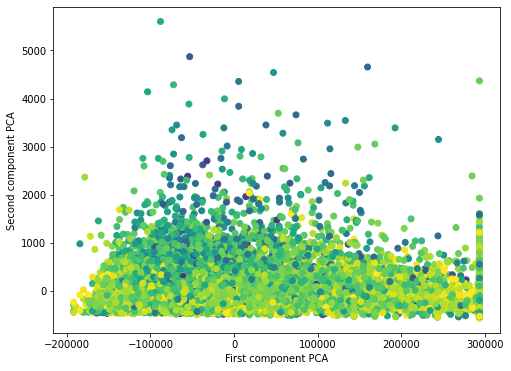

In [61]:
plt.figure(figsize = (8,6))
plt.scatter(tr_pca[:,0],tr_pca[:,1],c = data['housing_median_age'])
plt.xlabel("First component PCA")
plt.ylabel("Second component PCA")

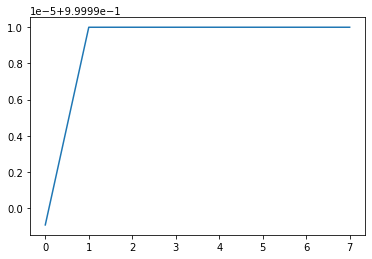

In [72]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)